In [27]:
%matplotlib inline
import numpy as np
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import mglearn

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris: \n{}".format(iris_dataset.keys()))
# get keys of dataset
# DESCR = description of dataset

Keys of iris: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print(iris_dataset['DESCR'][:500] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

  
...


In [7]:
print("Target names: \n{}".format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [8]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print("Type of data: \n{}".format(type(iris_dataset['data'])))

Type of data: 
<class 'numpy.ndarray'>


In [12]:
print("Shape of data: \n{}".format(iris_dataset['data'].shape))

Shape of data: 
(150, 4)


In [15]:
print("First five columns: \n{}".format(iris_dataset['data'][:5]))

First five columns: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [16]:
print("Type of target: \n{}".format(type(iris_dataset['target'])))

Type of target: 
<class 'numpy.ndarray'>


In [17]:
print("Shape of target: \n{}".format(iris_dataset['target'].shape))

Shape of target: 
(150,)


In [21]:
print("Target: \n{}".format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state=0)
# train_test_split defaults to 75% train, 25% test

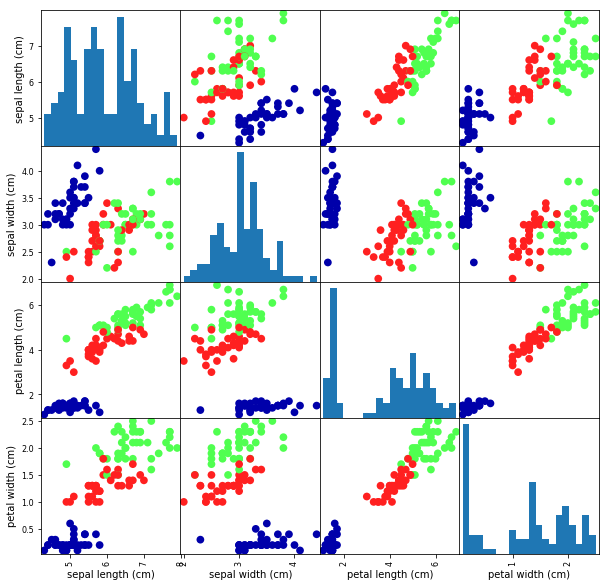

In [37]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
# convert to pandas dataframe with columns labeled by feature name
# use scatter_matrix function (deprecated use of only .scatter_matrix, now .plotting.scatter_matrix)
# color by species (c=y_train), figsize obvious, marker type, # of hist bins, size of markers, transparency, color map

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
X_new = np.array([[5,2.9,1,0.2]])
# fake data to see model in action; note need 2D Numpy array for scikit-learn

In [48]:
prediction = knn.predict(X_new)
print("Prediction: \n{}".format(iris_dataset['target_names'][prediction]))
# ok...

Prediction: 
['setosa']


In [49]:
y_pred = knn.predict(X_test)

In [52]:
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))
#Two methods of computing score of model on test data

Test set score: 0.97
Test set score: 0.97
